# WOTN AIREXPO SURVEY COMMNENT ANALYSIS

In [1]:
import pandas as pd
import re

### Section 1: Import Survey Comments

In [2]:
data = pd.read_csv('D://DataSets//WOTN_Survey.csv', encoding = 'cp1252')
data

,first_AirExpo,past_AirExpos,likely_to_come_back,likely_to_recommend,age_group,Explain,Comments,entry_id
0,No,6.0,10,10,36 - 50,NaN,NaN,146
1,No,1.0,9,9,36 - 50,NaN,This year's Expo was great! Hands down a huge ...,145
2,Yes,NaN,10,10,66+,NaN,Appreciated the helpfulness of onsite local po...,142
3,No,6.0,9,10,36 - 50,NaN,NaN,141
4,Yes,NaN,6,8,36 - 50,I wanted to take my daughter to an air show th...,Website said breakfast on both days but there ...,140
...,...,...,...,...,...,...,...,...
62,No,3.0,7,6,51 - 65,NaN,The parking for 2021 was the worst ever. It to...,82
63,No,4.0,10,10,36 - 50,NaN,The variety of new aircraft was nice. I would ...,81
64,Yes,NaN,9,9,51 - 65,NaN,The show was absolutely fantastic!,80
65,Yes,NaN,8,8,36 - 50,NaN,The drive in and parking was atrocious.\nThere...,79


### Let's just look at the comments column

In [3]:
comments = data.drop(['first_AirExpo', 'past_AirExpos', 'likely_to_come_back', 'likely_to_recommend', 
           'age_group','Explain','entry_id'], axis=1)

comments = comments.dropna()

comments['Comments'] = comments['Comments'].astype('string')

comments

,Comments
1,This year's Expo was great! Hands down a huge ...
2,Appreciated the helpfulness of onsite local po...
4,Website said breakfast on both days but there ...
5,AirExpo was fun and it was great being able to...
8,A fantastic event! I was not sure if the kids ...
9,Loved the A-10s. Everyone did a great job.
10,Serve beer for adults
11,None
13,We enjoyed our first time there! Will plan on ...
14,It was so much fun. Loved all the vets you had...


### clean, tokenize, and lemmatize words for analysis

In [4]:
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = text.lower()
    return text

comments['cleaned_comments'] = comments['Comments'].apply(clean)
comments.head()

,Comments,cleaned_comments
1,This year's Expo was great! Hands down a huge ...,this year s expo was great hands down a huge i...
2,Appreciated the helpfulness of onsite local po...,appreciated the helpfulness of onsite local po...
4,Website said breakfast on both days but there ...,website said breakfast on both days but there ...
5,AirExpo was fun and it was great being able to...,airexpo was fun and it was great being able to...
8,A fantastic event! I was not sure if the kids ...,a fantastic event i was not sure if the kids c...


In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

In [6]:
comments['POS_tagged'] = comments['cleaned_comments'].apply(token_stop_pos)
comments.head()

,Comments,cleaned_comments,POS_tagged
1,This year's Expo was great! Hands down a huge ...,this year s expo was great hands down a huge i...,"[(year, n), (expo, n), (great, a), (hands, n),..."
2,Appreciated the helpfulness of onsite local po...,appreciated the helpfulness of onsite local po...,"[(appreciated, v), (helpfulness, n), (onsite, ..."
4,Website said breakfast on both days but there ...,website said breakfast on both days but there ...,"[(website, n), (said, v), (breakfast, n), (day..."
5,AirExpo was fun and it was great being able to...,airexpo was fun and it was great being able to...,"[(airexpo, n), (fun, n), (great, a), (able, a)..."
8,A fantastic event! I was not sure if the kids ...,a fantastic event i was not sure if the kids c...,"[(fantastic, a), (event, n), (sure, a), (kids,..."


In [7]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

In [8]:
comments['Lemma'] = comments['POS_tagged'].apply(lemmatize)
comments.head()

,Comments,cleaned_comments,POS_tagged,Lemma
1,This year's Expo was great! Hands down a huge ...,this year s expo was great hands down a huge i...,"[(year, n), (expo, n), (great, a), (hands, n),...",year expo great hand huge improvement one go...
2,Appreciated the helpfulness of onsite local po...,appreciated the helpfulness of onsite local po...,"[(appreciated, v), (helpfulness, n), (onsite, ...",appreciate helpfulness onsite local police a...
4,Website said breakfast on both days but there ...,website said breakfast on both days but there ...,"[(website, n), (said, v), (breakfast, n), (day...",website say breakfast day none saturday food...
5,AirExpo was fun and it was great being able to...,airexpo was fun and it was great being able to...,"[(airexpo, n), (fun, n), (great, a), (able, a)...",airexpo fun great able get close aircraft fu...
8,A fantastic event! I was not sure if the kids ...,a fantastic event i was not sure if the kids c...,"[(fantastic, a), (event, n), (sure, a), (kids,...",fantastic event sure kid could climb seat pl...


## Section 2: Create a textblob sentiment analysis

In [9]:
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [10]:
fin_data = pd.DataFrame(comments[['Comments', 'Lemma']])

fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity)
fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,Comments,Lemma,Polarity,Subjectivity,Analysis
1,This year's Expo was great! Hands down a huge ...,year expo great hand huge improvement one go...,0.426667,0.563333,Positive
2,Appreciated the helpfulness of onsite local po...,appreciate helpfulness onsite local police a...,0.000000,0.500000,Neutral
4,Website said breakfast on both days but there ...,website say breakfast day none saturday food...,0.700000,0.950000,Positive
5,AirExpo was fun and it was great being able to...,airexpo fun great able get close aircraft fu...,0.343750,0.434375,Positive
8,A fantastic event! I was not sure if the kids ...,fantastic event sure kid could climb seat pl...,0.392857,0.725397,Positive


#### Looks like the the rating in about 27/45 = .6 as shown in the pie chart

In [11]:
tb_counts = fin_data.Analysis.value_counts()

tb_counts

Positive    27
Neutral     12
Negative     6
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x1cbb9b5ba30>,
 [Text(-0.33991877217145816, 1.046162142464278, 'Positive'),
  Text(-0.11498109791557498, -1.093974107153423, 'Neutral'),
  Text(1.2332865100516217, -0.5490941486891763, 'Negative')],
 [Text(-0.18541023936624987, 0.5706338958896061, '60.0%'),
  Text(-0.06271696249940453, -0.5967131493564125, '26.7%'),
  Text(0.7765137285510211, -0.3457259454709628, '13.3%')])

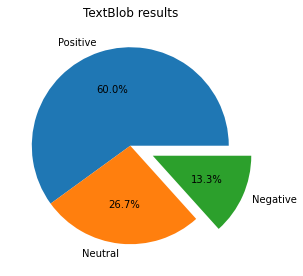

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [13]:
### Subjectively has an average of ~0.4 which means most comments are possitive.

In [14]:
fin_data.describe()

,Polarity,Subjectivity
count,45.000000,45.000000
mean,0.186371,0.403320
std,0.313103,0.302341
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.162500,0.441667
75%,0.368571,0.571429
max,1.000000,1.000000


In [15]:
### Boxplot reassures this.

<AxesSubplot:>

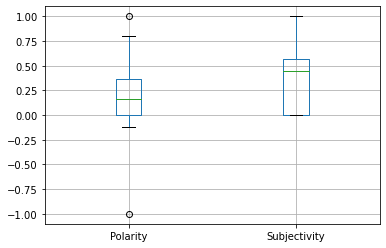

In [16]:
boxplot = fin_data.boxplot(column=['Polarity', 'Subjectivity']) 
boxplot

In [17]:
## In this section we will look at how words relate to each other using PMI Matrix Methods.

In [18]:
from collections import Counter
from itertools import combinations
from math import log
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pformat
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds, norm
from string import punctuation

In [19]:
%%time
punctrans = str.maketrans(dict.fromkeys(punctuation))
def tokenize(Lemma):
    x = Lemma.lower() # Lowercase
    x = x.encode('ascii', 'ignore').decode() # Keep only ascii chars.
    x = x.translate(punctrans) # Remove punctuation
    return x.split() # Return tokenized.

texts_tokenized = comments['Lemma'].apply(tokenize)

CPU times: total: 0 ns
Wall time: 999 µs


In [20]:
%%time
cx = Counter()
cxy = Counter()
for text in texts_tokenized:
    for x in text:
        cx[x] += 1
    for x, y in map(sorted, combinations(text, 2)):
        cxy[(x, y)] += 1

CPU times: total: 31.2 ms
Wall time: 17 ms


In [21]:
%%time
x2i, i2x = {}, {}
for i, x in enumerate(cx.keys()):
    x2i[x] = i
    i2x[i] = x

CPU times: total: 0 ns
Wall time: 1 ms


In [22]:
sx = sum(cx.values())
sxy = sum(cxy.values())

In [23]:
### Bigram shows mainly helpfulness of organizers, not much else.

In [24]:
pmi_samples = Counter()
data, rows, cols = [], [], []
for (x, y), n in cxy.items():
    rows.append(x2i[x])
    cols.append(x2i[y])
    data.append(log((n / sxy) / (cx[x] / sx) / (cx[y] / sx)))
    pmi_samples[(x, y)] = data[-1]
PMI = csc_matrix((data, (rows, cols)))
print('%d non-zero elements' % PMI.count_nonzero())
print('Sample PMI values\n', pformat(pmi_samples.most_common()[:10]))

8603 non-zero elements
Sample PMI values
 [(('ago', 'suggest'), 3.8724209761861315),
 (('ago', 'available'), 3.8724209761861315),
 (('ago', 'lineup'), 3.8724209761861315),
 (('available', 'suggest'), 3.8724209761861315),
 (('lineup', 'suggest'), 3.8724209761861315),
 (('available', 'lineup'), 3.8724209761861315),
 (('helpfulness', 'onsite'), 3.8724209761861315),
 (('helpfulness', 'local'), 3.8724209761861315),
 (('attempt', 'helpfulness'), 3.8724209761861315),
 (('helpfulness', 'unlock'), 3.8724209761861315)]


In [25]:
%%time
U, _, _ = svds(PMI, k=20)

CPU times: total: 31.2 ms
Wall time: 22.1 ms


In [26]:
norms = np.sqrt(np.sum(np.square(U), axis=1, keepdims=True))
U /= np.maximum(norms, 1e-7)

In [27]:
### K Nearest Neghbors shows some good insight:
#### 1. Patrking was bad
#### 2. Entering the airshow was bad
#### 2. Spitfire was popular

In [28]:
k = 5
for x in ['parking', 'drive', 'food', 'static', 'entrance', 'breakfast', 'airexpo']:
    dd = np.dot(U, U[x2i[x]]) # Cosine similarity for this unigram against all others.
    s = ''
    # Compile the list of nearest neighbor descriptions.
    # Argpartition is faster than argsort and meets our needs.
    for i in np.argpartition(-1 * dd, k + 1)[:k + 1]:
        if i2x[i] == x: continue
        s += '(%s, %.3lf) ' % (i2x[i], dd[i])
    print('%s, %d\n %s' % (x, cx[x], s))
    print('-' * 10)

parking, 11
 (specific, 0.766) (spot, 0.813) (national, 0.766) (shame, 0.755) (nascar, 0.741) 
----------
drive, 4
 (gate, 0.608) (fact, 0.561) (around, 0.552) (field, 0.560) (long, 0.548) 
----------
food, 13
 (family, 0.857) (low, 0.841) (nobody, 0.829) (hurricane, 0.819) (measure, 0.853) 
----------
static, 2
 (spitfire, 0.983) (sun, 0.979) (trip, 0.974) (think, 0.969) (unfortunately, 0.959) 
----------
entrance, 4
 (impatient, 0.981) (dr, 0.994) (hate, 0.988) (pioneer, 0.930) (intersection, 0.771) 
----------
breakfast, 3
 (dad, 0.839) (elderly, 0.819) (activity, 0.866) (last, 0.764) (love, 0.757) 
----------
airexpo, 1
 (early, 0.992) (fun, 0.986) (able, 1.000) (nearly, 0.899) (know, 0.954) 
----------
